# Recesiones en México

Arthur Burns y Wesley Michell en 1946 en su libro "Measuring Bussiness Cycles" definen al ciclo económico como:

"…*las fluctuaciones en la actividad agregada de un país que se encuentra organizada en empresas de negocios*…"

**El ciclo económico clásico se caracteriza por tres fases principales:** 

I.	**Recesión**: es la etapa donde la actividad económica comienza a disminuir y termina cuando la actividad económica alcanza su punto más bajo. 

II.	**Recuperación**: comienza cuando la actividad económica comienza a crecer despues de una recesión y termina cuando la actividad alcanza el nivel del pico donde comenzó la recesión.

III. **Expansión**: Es cuando la actividad económica se está expandiendo y supera el nivel del pico de la recesión.


Un ciclo económico clásico se vería de la siguiente manera

**texto en negrita**![image-2.png](attachment:image-2.png)

Fuente: Jonathan Heath (2012), Lo que indican los indicadores. Cómo utilizar la información estadística para entender la realidad económica de México. INEGI. versión electrónica: https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825003406

De acuerdo con el Cómite de Fechado de Ciclos de la Economía de México, han ocurrido las siguientes recesiones desde 1980 hasta la actualidad.

| | Recesión  | Fecha inicio    | Fecha Fin   | Duración   |
|---:|:-------------|:-----------|:------|:------|
| 1 | Crisis del 82 | Dic-1981       | Jun-1983   | 19 meses     |
| 2 | Crisis del 86  | Oct-1985    | Dic-1986   | 15 meses     |
| 3 | Crisis del 94  | Dic-1994    | May-1995   | 6 meses     |
| 4 | Crisis del 01  | Oct-2000    | Ene-2002   | 16 meses     |
| 5 | Crisis del 08  | Jul-2008    | May-2009   | 11 meses     |
| 6 | Crisis del Covid | Jun-2019    | May-2020   | 12 meses     |

Por lo tanto en esta notebook se analizara el último ciclo económico de la economía mexicana. Pero antes de nuestro análisis graficaremos y veremos los ciclos de la economía mexicana y la evolución del PIB trimestral desestacionalizado.

**Antes que nada importamos las librerías básicas**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

primero importamos los datos de los archivos que se adjuntan en esta tarea

In [4]:
## los datos mensuales de las recesiones
datos_rec = pd.read_excel('recesionmex.xlsx')

## los datos del PIB de México
pib_trim=pd.read_excel('pib_trim.xlsx')

In [5]:
datos_rec

,fecha,recesion
0,1980/01,0
1,1980/02,0
2,1980/03,0
3,1980/04,0
4,1980/05,0
...,...,...
505,2022/02,0
506,2022/03,0
507,2022/04,0
508,2022/05,0


In [6]:
pib_trim

,fecha,PIB
0,1980/03,7.477954e+06
1,1980/06,7.501150e+06
2,1980/09,7.677707e+06
3,1980/12,7.913464e+06
4,1981/03,8.155986e+06
...,...,...
165,2021/06,1.789327e+07
166,2021/09,1.779862e+07
167,2021/12,1.785390e+07
168,2022/03,1.805777e+07


asegurarse que las fechas sean fechas

In [7]:
## convertimos en fechas los datos de recesión
datos_rec['fecha']=pd.to_datetime(datos_rec['fecha'])
# convertimos en fechas los datos del PIB
pib_trim.fecha=pd.PeriodIndex(pib_trim.fecha, freq='Q')

In [8]:
#creamos un duplicado de los datos de recesión
datos_rec2=datos_rec.copy()

## recesiones es un 1, así que multiplicamos para que las areas gris lleguen cubra los limites del eje Y
datos_rec2['recesion']=datos_rec2['recesion']*pib_trim['PIB'].max()*1.1


**Graficamos y sombreamos las recesiones**

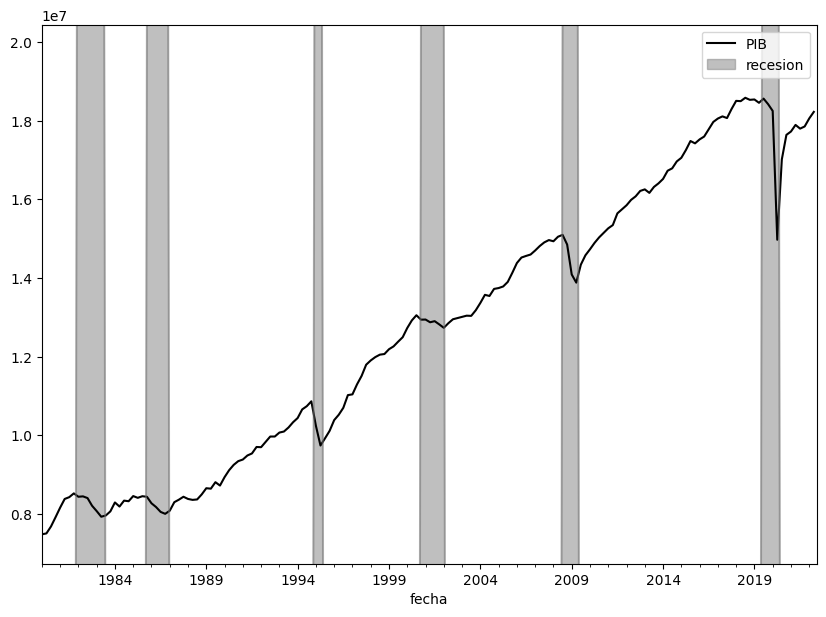

In [9]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
datos_rec2.plot.area(ax=ax, figsize=(10, 7), x='fecha', alpha=0.5, color="gray")
plt.ylim(pib_trim['PIB'].min()*0.9, pib_trim['PIB'].max()*1.1)
plt.show()

**Graficamos la última recesión de México**

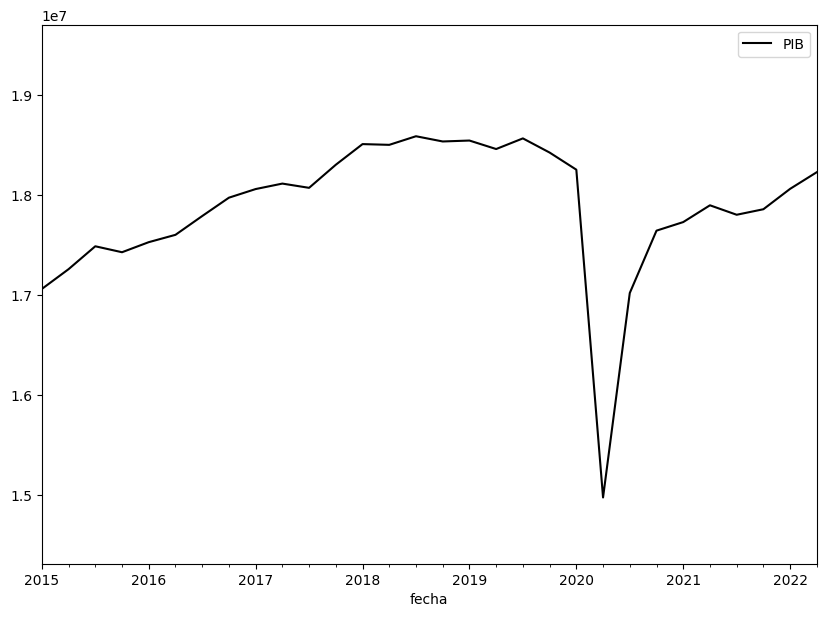

In [10]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim('2015-01-01', '2022-06-01')
plt.show()

como podras notar aun no se recupera el nivel del PIB que México tenia previo a la pandemia, la pregunta es **¿cuándo recuperara México el PIB previo de la recesión de la Pandemia?**

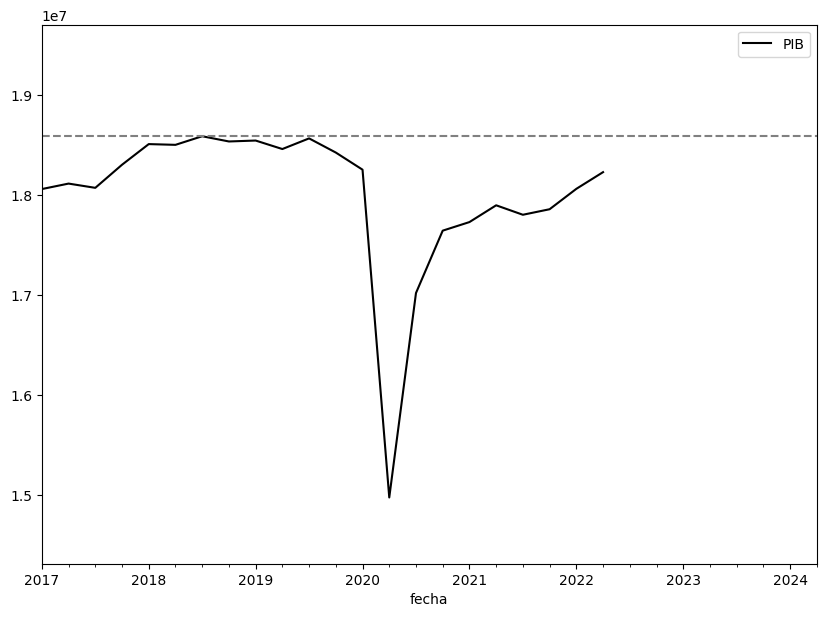

In [11]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
ax.axhline(y=pib_trim['PIB'].max(), color="gray", linestyle='--')
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim('2017-01-01', '2024-06-01')
plt.show()

Así que tu trabajo sera hacer un pronóstico de cuantos trimestres mas le tomará a la economía recuperar su nivel prepandemia y si esa recuperación ocurrirá al final del sexenio

Realiza lo siguiente:
1. Prueba de raíz unitaria para verificar que el PIB sea una serie estacionaria
2. En caso de que no lo sea diferencia el PIB y guardalo en un objeto llamado pib_diff
3. Realiza la prueba de raíz unitaria y verifica que la primera diferencia del PIB sea estacionario
4. Una vez que el PIB sea estacionario  realiza las gráficas de ACF y PACF para tratar de identificar el proceso, y plantea por lo menos tres procesos (solo plantearlos, no estimarlos)
5. Con base en la notebook "pronostico_arima" utiliza la función "*if*" para probar hasta un arma(6,6) de la series pib_diff
6. Si naciste en enero-junio utiliza el criterio bayesiano de información (BIC) para seleccionar el modelo, si naciste julio-diciembre utiliza el criterio de Akaike (AIC).


In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [13]:
pib_trim=pib_trim.set_index('fecha')

**los siguientes códigos son para ayudarte a estimar tu modelo**

In [14]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

In [15]:
# prueba de dickey-fuller aumentada
ADF_test1 = adfuller(pib_trim['PIB'])
#Ho: Serie No estacionaria

#significancia 5%
alpha =0.05

if ADF_test1[1] < alpha:
    print('rechazamos Ho, La serie es estacionaria')
else:
    print('No rechazamos Ho, La serie es No estacionaria')

No rechazamos Ho, La serie es No estacionaria


Podemos observar que la serie es no estacionaria. Por lo tanto, procedemos a convertirla a estacionaria usando primeras diferencias.

In [16]:
pib_trim['PIB_diff']=pib_trim['PIB'].diff()

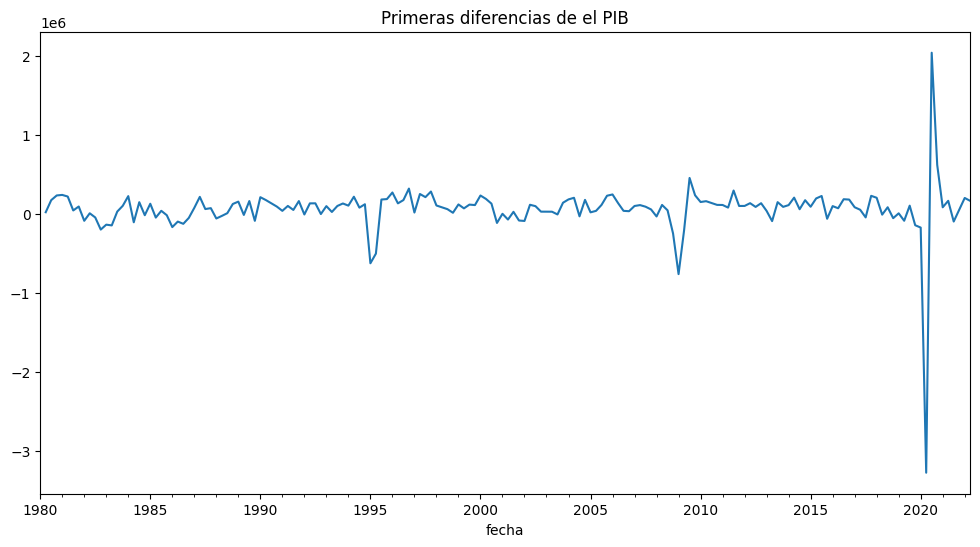

In [17]:
# graficaré el tipo de cambio diferenciado
pib_trim['PIB_diff'].plot(figsize=(12,6))
plt.title('Primeras diferencias de el PIB')
plt.show()

In [18]:
# prueba de dickey-fuller aumentada
ADF_test2 = adfuller(pib_trim['PIB_diff'].dropna())
#Ho: Serie No estacionaria

#significancia 5%
alpha =0.05

if ADF_test2[1] < alpha:
    print('rechazamos Ho, La serie es estacionaria')
else:
    print('No rechazamos Ho, La serie es No estacionaria')

rechazamos Ho, La serie es estacionaria


Una vez vemos que la serie es estacionara, procedemos a paso 2

2. Determinar que tipo de proceso es

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


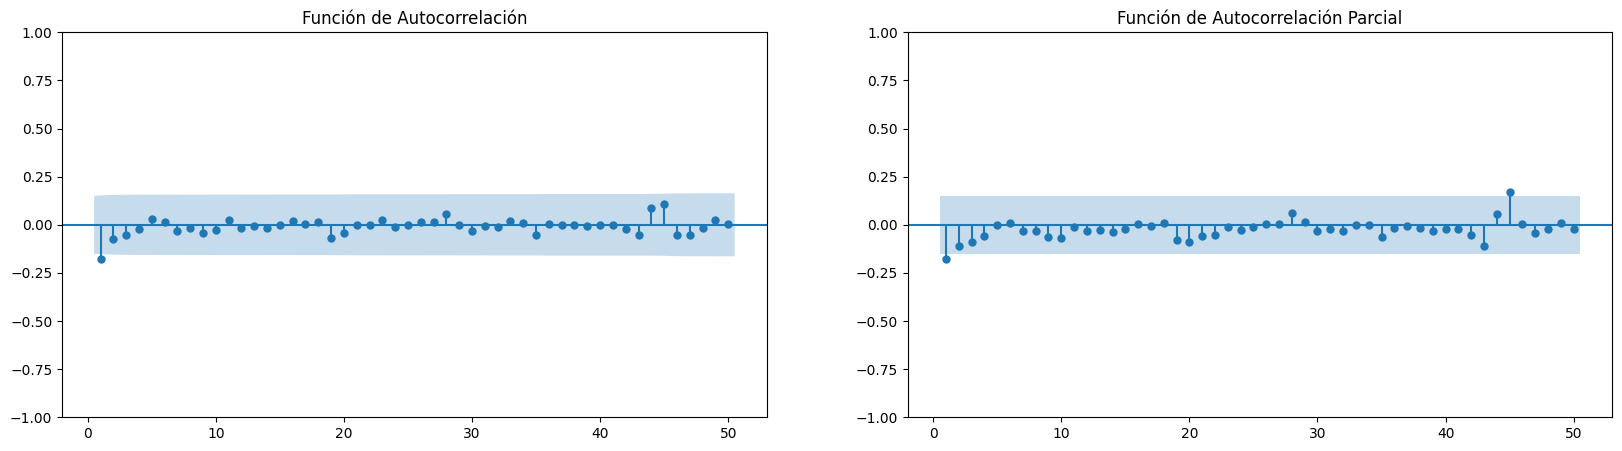

In [19]:
ig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(pib_trim['PIB_diff'].dropna(), zero=False, lags=50, ax=ax[0],title="Función de Autocorrelación")
ax[0].set_ylim(-1,1)
plot_pacf(pib_trim['PIB_diff'].dropna(), zero=False, lags=50, ax=ax[1], title="Función de Autocorrelación Parcial")
ax[1].set_ylim(-1,1)
plt.show()

Según lo que se visualiza en las gráficas PAC y PACF, puedo decir a simple vista que unos modelos ARMA serían:
1. ARMA(0,1,10)
2. ARMA(2,1,3)
3. ARMA(1,1,3)

In [20]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
## Nos interesa pronosticar el PIB de méxico
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(pib_trim['PIB_diff'], order=(ar, 1, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 3
AR: 3, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5
AR: 3, MA: 6
AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

AR: 4, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AR: 5, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

AR: 6, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
#Obtenemos el nmodelo más optimo
ic.sort_values('AIC', ascending=True)[0:10]

AIC          BIC
AR MA                          
1  2   4789.063348  4801.582943
0  3   4789.180911  4801.700506
   2   4789.570551  4798.960247
1  3   4790.416262  4806.065755
2  2   4790.906464  4806.555957
0  4   4791.068279  4806.717772
2  3   4792.454439  4811.233832
3  2   4792.700888  4811.480281
1  4   4793.021714  4811.801106
0  5   4793.992188  4812.771581

Podemos decir que el modelo más optimo según el criterio AIC es un ARMA(1,1,2)

Al ser mi mes de cumpleaños, Julio, usaré el criterio AIC para estimar el pronostico

In [22]:
#ejecuta el siguiente modelo definiendo el orden ARIMA (p,I,q) que sugieren los pasos anteriores
# yo aleatoriamente elegi un arima(1,1,1)
p=1
I=1
q=2 

model = ARIMA(pib_trim['PIB'],order=(p,I,q))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    PIB   No. Observations:                  170
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2390.057
Date:                Wed, 10 May 2023   AIC                           4788.114
Time:                        23:59:51   BIC                           4800.633
Sample:                    03-31-1980   HQIC                          4793.195
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.004    232.581      0.000       0.992       1.008
ma.L1         -1.0484      0.030    -34.608      0.000      -1.108      -0.989
ma.L2          0.0493      0.024      2.080      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
## nota que la serie de tiempo el primer trimestre de 1980 es 0, 
## y el segundo trimestre de 2022 es 169
pib_trim

,PIB,PIB_diff
fecha,,
1980Q1,7.477954e+06,NaN
1980Q2,7.501150e+06,23196.019979
1980Q3,7.677707e+06,176556.367223
1980Q4,7.913464e+06,235757.117109
1981Q1,8.155986e+06,242521.879502
...,...,...
2021Q2,1.789327e+07,167830.277268
2021Q3,1.779862e+07,-94646.967531
2021Q4,1.785390e+07,55276.784448


por tanto nosotros queremos graficar el tercer trimestre de 2022 (170), el cuarto trimestre de 2022 (171), etc.

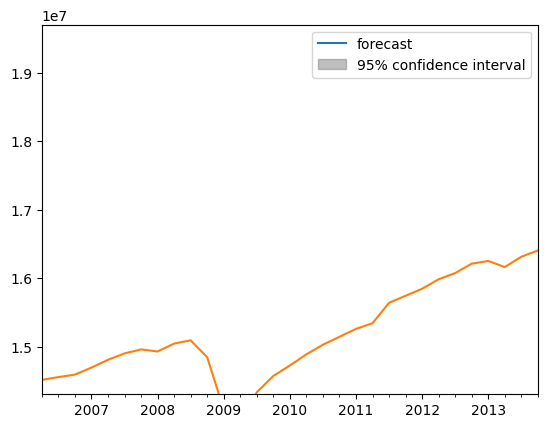

In [24]:
# graficamente esto es lo que buscamos
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(results, start=170,end=175)
plt.plot(pib_trim['PIB'])
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim(145,175)
plt.show()


In [25]:
## el valor máximo lo podemos buscar de forma sencilla con 
pib_trim['PIB'].max()

18583728.7115077

pronosticamos dos años

In [26]:
results.predict(170, 178)

2022Q3    1.828149e+07
2022Q4    1.834378e+07
2023Q1    1.840607e+07
2023Q2    1.846836e+07
2023Q3    1.853064e+07
2023Q4    1.859292e+07
2024Q1    1.865520e+07
2024Q2    1.871747e+07
2024Q3    1.877975e+07
Freq: Q-DEC, Name: predicted_mean, dtype: float64

creamos un duplicado

In [27]:
results2=results.predict(170,178).copy()

In [28]:
results2

2022Q3    1.828149e+07
2022Q4    1.834378e+07
2023Q1    1.840607e+07
2023Q2    1.846836e+07
2023Q3    1.853064e+07
2023Q4    1.859292e+07
2024Q1    1.865520e+07
2024Q2    1.871747e+07
2024Q3    1.877975e+07
Freq: Q-DEC, Name: predicted_mean, dtype: float64

verificamos en que trimestre se alcanza otra vez el valor máximo, y anoten en la conclusion que trimestre se alcanza (recuerden que es un intervalo de 95% de confianza)

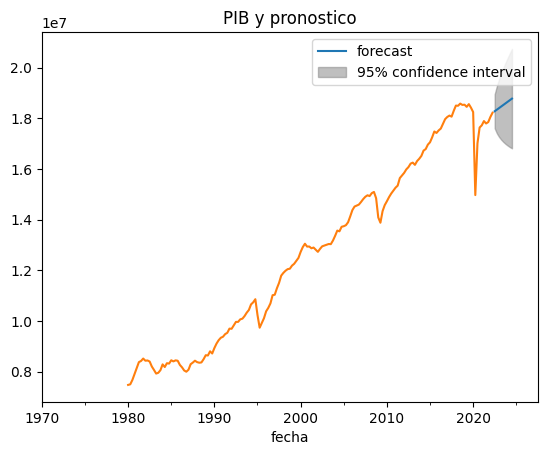

In [29]:
#libreria para la gráfica del pronostico
from statsmodels.graphics.tsaplots import plot_predict
#codigo
plot_predict(results,start=170,end=178)
pib_trim['PIB'].plot()
plt.title('PIB y pronostico')
plt.xlim(0,230)
plt.show()

Podemos notar de acuerdo a el valor que nos arroja la funcion max para obtener el PIB máximo, el cual es **18583728.7115077**, que según el pronostico realizado con las pruebas y datos. Le tomará al menos unos 6 trimestres más alcanzar el PIB previo a la pandemia. Esto es en el 4 trimestre del año 2023, podemos decir que según el pronóstico realizado, el PIB volverá e incluso mejorara antes del final del sexenio de AMLO.

Añade nombre, matricula y grupo


# Alejandro Hernández Cerda 1903855 gpo:041